In [1]:
import numpy as np
import copy
from matplotlib import pyplot as plt
from matplotlib import animation

%matplotlib inline

plt.rcParams["animation.html"] = "jshtml"

[0. 0. 0.]
[1 1 -1]
[0.0 0.0 -0.0]
0.0
RESULT: w: [1.0 1.0] b: -3.0


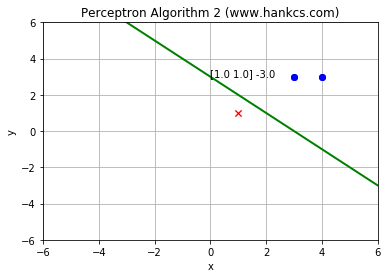

In [12]:
# An example in that book, the training set and parameters' sizes are fixed
training_set = np.array([[[3, 3], 1], [[4, 3], 1], [[1, 1], -1]])

a = np.zeros(len(training_set), np.float)
b = 0.0
Gram = None
y = np.array(training_set[:, 1])

x = np.empty((len(training_set), 2), np.float)
for i in range(len(training_set)):
    x[i] = training_set[i][0]
history = []
 
def cal_gram():
    """
    calculate the Gram matrix
    :return:
    """
    g = np.empty((len(training_set), len(training_set)), np.int)
    for i in range(len(training_set)):
        for j in range(len(training_set)):
            g[i][j] = np.dot(training_set[i][0], training_set[j][0])
    return g

def update(i):
    """
    update parameters using stochastic gradient descent
    :param i:
    :return:
    """
    global a, b
    a[i] += 1
    b = b + y[i]
    history.append([np.dot(a * y, x), b])
    # print a, b # you can uncomment this line to check the process of stochastic gradient descent

# calculate the judge condition
def cal(i):
    global a, b, x, y
 
    res = np.dot(a * y, Gram[i])
    res = (res + b) * y[i]
    return res

def check():
    global a, b, x, y
    flag = False
    for i in range(len(training_set)):
        if cal(i) <= 0:
            flag = True
            update(i)
    if not flag:
 
        w = np.dot(a * y, x)
        print("RESULT: w: " + str(w) + " b: " + str(b))
        return False
    return True

Gram = cal_gram()  # initialize the Gram matrix
for i in range(1000):
    if not check(): break

# draw an animation to show how it works, the data comes from history
# first set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], 'g', lw=2)
label = ax.text([], [], '')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    x, y, x_, y_ = [], [], [], []
    for p in training_set:
        if p[1] > 0:
            x.append(p[0][0])
            y.append(p[0][1])
        else:
            x_.append(p[0][0])
            y_.append(p[0][1])

    plt.plot(x, y, 'bo', x_, y_, 'rx')
    plt.axis([-6, 6, -6, 6])
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Perceptron Algorithm 2 (www.hankcs.com)')
    return line, label


# animation function.  this is called sequentially
def animate(i):
    global history, ax, line, label

    w = history[i][0]
    b = history[i][1]
    if w[1] == 0: return line, label
    x1 = -7.0
    y1 = -(b + w[0] * x1) / w[1]
    x2 = 7.0
    y2 = -(b + w[0] * x2) / w[1]
    line.set_data([x1, x2], [y1, y2])
    x1 = 0.0
    y1 = -(b + w[0] * x1) / w[1]
    label.set_text(str(history[i][0]) + ' ' + str(b))
    label.set_position([x1, y1])
    return line, label

# call the animator.  blit=true means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(history), interval=1000, repeat=True,
                               blit=True)
anim

# data

In [2]:
training_set = [
    {"point": [3, 3], "label": 1},
    {"point": [4, 3], "label": 1},
    {"point": [1, 1], "label": -1}
]
hyperplane = {"normal_vector": [0, 0], "intercept": 0}
learning_rate = 1
history = []

# train

In [3]:
def isWrongSeperatedPoint(item):
    # https://github.com/hsiehpinghan/example/blob/master/formula-example/notebook/linear_algebra/point_to_hyperplane_distance.ipynb
    return item["label"] * (np.dot(hyperplane["normal_vector"], item["point"]) + hyperplane["intercept"]) <= 0

def modifyHyperplane(item):
    hyperplane["normal_vector"][0] += learning_rate * item["label"] * item["point"][0]
    hyperplane["normal_vector"][1] += learning_rate * item["label"] * item["point"][1]
    hyperplane["intercept"] += learning_rate * item["label"]

def train():
    while(True):
        hasAnyWrongSeperatedPoint = False
        for item in training_set:
            if(isWrongSeperatedPoint(item) == True):
                hasAnyWrongSeperatedPoint = True
                modifyHyperplane(item)
                history.append(copy.copy(hyperplane))
        if hasAnyWrongSeperatedPoint == False:
            break;

train()
print(history)

[{'normal_vector': [1, 1], 'intercept': 1}, {'normal_vector': [1, 1], 'intercept': 0}, {'normal_vector': [1, 1], 'intercept': -1}, {'normal_vector': [1, 1], 'intercept': -2}, {'normal_vector': [1, 1], 'intercept': -1}, {'normal_vector': [1, 1], 'intercept': -2}, {'normal_vector': [1, 1], 'intercept': -3}]


# animation

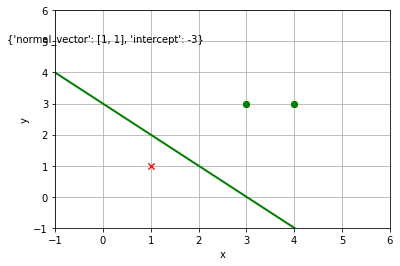

In [4]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], 'g', lw=2)
label = ax.text([], [], '')

def init_func():
    plt.axis([-1, 6, -1, 6])
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    for item in training_set:
        if(item["label"] == 1):
            plt.plot(item["point"][0], item["point"][1], 'go')
        else:
            plt.plot(item["point"][0], item["point"][1], 'rx')
    return line, label

def animate(i):
    hyperplane = history[i]
    x1 = -2
    y1 = -(hyperplane["normal_vector"][0] * x1 + hyperplane["intercept"]) / hyperplane["normal_vector"][0]
    x2 = 7
    y2 = -(hyperplane["normal_vector"][0] * x2 + hyperplane["intercept"]) / hyperplane["normal_vector"][0]
    line.set_data([x1, x2], [y1, y2])
    label.set_text(hyperplane)
    x_text = x1
    y_text = y1
    label.set_position([x_text, y_text])
    return line, label

ani = animation.FuncAnimation(fig=fig, func=animate, frames=len(history), init_func=init_func)
ani

# reference
## <a href = "http://www.hankcs.com/ml/the-perceptron.html">hankcs 感知机</a>